### Data Preprocessing

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from keras.layers import LSTM
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten
from keras import optimizers
from keras.callbacks import EarlyStopping

from numpy import array

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, AveragePooling1D,MaxPooling1D
from keras.layers import Conv1D,AveragePooling1D,MaxPooling1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
#import and fix date column
df = pd.read_csv('./df.csv')
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace = True)
df['date'] = df['date'].astype('datetime64[ns]')
# df.drop(columns='date', inplace=True)
df.set_index('date', drop=True, inplace=True)
# df=df.pct_change()
df

,open,high,low,close,adjusted close,volume,totalAssets,yield,trailingAnnualDividendYield,trailingAnnualDividendRate,trailingPE,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketVolume,averageVolume,averageDailyVolume10Day,threeYearAverageReturn,fiveYearAverageReturn,twoHundredDayAverage,fiftyDayAverage
date,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.799770,1003200,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.983273,480500,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-02,44.218750,44.375000,44.125000,44.343750,26.038315,201300,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.313566,529400,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.423655,531500,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,443.820007,443.880005,442.619995,443.779999,443.779999,44034300,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
2021-08-12,443.619995,445.260010,442.660004,445.109985,445.109985,38909400,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
2021-08-13,445.589996,445.940002,445.070007,445.920013,445.920013,39388300,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705


In [3]:
#outside sourece *see below for reference
#dropping rows with too many nulls
# df = df.loc[:, df.isna().sum()/df.shape[0] <= 0.1]
df = df.dropna(axis=0,how='all',subset=df.columns[1:])

In [4]:
df

,open,high,low,close,adjusted close,volume,totalAssets,yield,trailingAnnualDividendYield,trailingAnnualDividendRate,trailingPE,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketVolume,averageVolume,averageDailyVolume10Day,threeYearAverageReturn,fiveYearAverageReturn,twoHundredDayAverage,fiftyDayAverage
date,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.799770,1003200,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.983273,480500,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-02,44.218750,44.375000,44.125000,44.343750,26.038315,201300,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.313566,529400,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.423655,531500,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,443.820007,443.880005,442.619995,443.779999,443.779999,44034300,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
2021-08-12,443.619995,445.260010,442.660004,445.109985,445.109985,38909400,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705
2021-08-13,445.589996,445.940002,445.070007,445.920013,445.920013,39388300,374031319040,0.013,0.012446,5.563,3.0813,447.11,319.8,92673933,60670736,46772316,0.1858,0.1747,413.43503,437.09705


In [5]:
#outside sourece *see below for reference
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# Train/Test/Split
# 80/15/5
test_df =  int(np.round(0.2*len(df)))
train = df[:-test_df]
test = df[-test_df:]

val_df = int(np.round(0.25*len(test)))
val = test[:-val_df]
test_val = test[-val_df:]

#Scaling
sc = MinMaxScaler(feature_range=(-1, 1))
train_sc = sc.fit_transform(train.values)
val_sc = sc.transform(val.values)
test_sc = sc.transform(test.values)

X_train_sc,y_train_sc = train_sc[:,:-1],train_sc[:,-1] 
X_val_sc,y_val_sc = val_sc[:,:-1],val_sc[:,-1]
X_test_sc,y_test_sc = test_sc[:,:-1],test_sc[:,-1]

#sequential data input/output
n_steps_in =30
#tried 10/30/50/100/200
n_steps_out = 1 
#tried 1/3/5/10

train_time_x, train_time_y = split_sequences(X_train_sc, n_steps_in,n_steps_out)
val_time_x, val_time_y= split_sequences(X_val_sc, n_steps_in,n_steps_out)
test_time_x, test_time_y= split_sequences(X_test_sc, n_steps_in,n_steps_out)

In [6]:
#CNN
np.random.seed(718)
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)
epochs = 100
bs = 10 
lr =0.000005
X, y = split_sequences(X_train_sc, n_steps_in,n_steps_out)
n_features = X.shape[2]

model = Sequential()
model.add(Conv1D(filters=5,
                 kernel_size=2,
                 strides=2, 
                 activation='tanh',
                 input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1,activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_time_x, train_time_y,
          batch_size=bs,
          epochs=epochs, 
          callbacks= [EarlyStop] ,
          verbose=2, 
          shuffle=False,
          validation_data =(val_time_x, val_time_y))
                             
model.summary()

Epoch 1/100
573/573 - 17s - loss: 0.0771 - val_loss: 0.0049
Epoch 2/100
573/573 - 0s - loss: 2.2358e-04 - val_loss: 0.0023
Epoch 3/100
573/573 - 1s - loss: 1.0748e-04 - val_loss: 0.0014
Epoch 4/100
573/573 - 1s - loss: 6.0183e-05 - val_loss: 0.0010
Epoch 5/100
573/573 - 1s - loss: 3.5118e-05 - val_loss: 7.9080e-04
Epoch 6/100
573/573 - 1s - loss: 2.6646e-05 - val_loss: 6.0445e-04
Epoch 7/100
573/573 - 1s - loss: 1.6231e-05 - val_loss: 4.9760e-04
Epoch 8/100
573/573 - 1s - loss: 1.1884e-05 - val_loss: 3.7712e-04
Epoch 9/100
573/573 - 1s - loss: 8.1043e-06 - val_loss: 3.1000e-04
Epoch 10/100
573/573 - 1s - loss: 5.3215e-06 - val_loss: 2.6643e-04
Epoch 11/100
573/573 - 1s - loss: 4.3071e-06 - val_loss: 2.2688e-04
Epoch 12/100
573/573 - 1s - loss: 2.6327e-06 - val_loss: 1.9427e-04
Epoch 13/100
573/573 - 1s - loss: 2.1861e-06 - val_loss: 1.6808e-04
Epoch 14/100
573/573 - 1s - loss: 1.9215e-06 - val_loss: 1.4103e-04
Epoch 15/100
573/573 - 0s - loss: 1.1590e-06 - val_loss: 1.1564e-04
Epoch 16

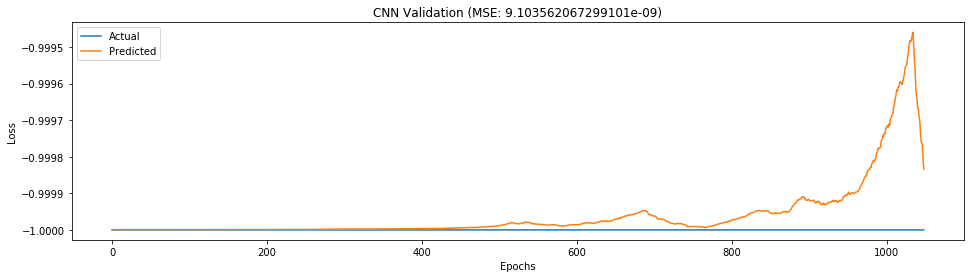

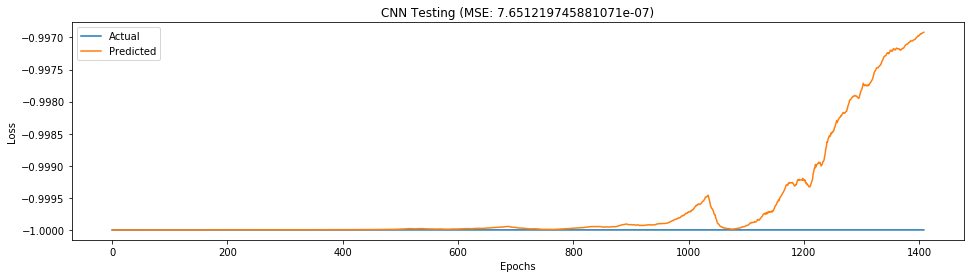

In [7]:
def plot_results(actual_y,predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(['Actual','Predicted'])
    plt.title(f'{method} (MSE: {mse})') 
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()

cnnvalpred = model.predict(val_time_x)
cnntestpred = model.predict(test_time_x)
    
plot_results(val_time_y ,cnnvalpred  ,'CNN Validation',range(len(val_time_y)))
plot_results(test_time_y ,cnntestpred  ,'CNN Testing',range(len(test_time_y)))

In [ ]:
#LSTM
np.random.seed(718)
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)
epochs = 100
lr =0.0005
bs = 10
n_steps_in =30
n_steps_out = 1

X, y = split_sequences(X_train_sc, n_steps_in,n_steps_out)
n_features = X.shape[2]

model = Sequential()
model.add(LSTM(300, 
               input_shape=(n_steps_in, n_features),
               activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_time_x, train_time_y,batch_size=bs,epochs=epochs, callbacks= [EarlyStop] ,verbose=2, shuffle=False,
                         validation_data =(val_time_x, val_time_y))

model.summary()

Epoch 1/100
573/573 - 26s - loss: 0.0022 - val_loss: 0.0037
Epoch 2/100
573/573 - 22s - loss: 6.0127e-13 - val_loss: 0.0037
Epoch 3/100
573/573 - 22s - loss: 5.7981e-13 - val_loss: 0.0037
Epoch 4/100
573/573 - 23s - loss: 5.7256e-13 - val_loss: 0.0037
Epoch 5/100
573/573 - 23s - loss: 5.6555e-13 - val_loss: 0.0037
Epoch 6/100
573/573 - 22s - loss: 6.0521e-13 - val_loss: 0.0037
Epoch 7/100
573/573 - 22s - loss: 5.2980e-13 - val_loss: 0.0037
Epoch 8/100
573/573 - 22s - loss: 5.6985e-13 - val_loss: 0.0037
Epoch 9/100
573/573 - 22s - loss: 5.6993e-13 - val_loss: 0.0037
Epoch 10/100
573/573 - 23s - loss: 5.5639e-13 - val_loss: 0.0037
Epoch 11/100
573/573 - 24s - loss: 5.9180e-13 - val_loss: 0.0037
Epoch 12/100
573/573 - 22s - loss: 5.9914e-13 - val_loss: 0.0037
Epoch 13/100
573/573 - 22s - loss: 5.7769e-13 - val_loss: 0.0037
Epoch 14/100
573/573 - 22s - loss: 5.9281e-13 - val_loss: 0.0037
Epoch 15/100
573/573 - 22s - loss: 5.6876e-13 - val_loss: 0.0037
Epoch 16/100
573/573 - 22s - loss: 5.2

In [ ]:
lstmvalpred = model.predict(val_time_x)
lstmtestpred = model.predict(test_time_x)

plot_results(val_time_y ,lstmvalpred  ,'LSTM Validation',range(len(val_time_y)))
plot_results(test_time_y ,lstmtestpred  ,'LSTM Testing',range(len(test_time_y)))

In [ ]:
#CNN/LSTM
np.random.seed(718)
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)
epochs = 100
lr =0.05 
n_steps_in =30
n_steps_out = 1
X, y = split_sequences(X_train_sc, n_steps_in,n_steps_out)
n_features = X.shape[2]

model = Sequential()
model.add(Conv1D(filters=5,
                 kernel_size=2,
                 strides=2, 
                 activation='tanh',
                 input_shape=(n_steps_in, n_features))) 
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.1)) 

model.add(LSTM(300,
               input_shape=(n_steps_in, n_features),
               return_sequences=True,
               activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1,activation = 'tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_time_x, train_time_y,batch_size=bs,epochs=epochs, callbacks= [EarlyStop] ,verbose=2, shuffle=False,
                         validation_data =(val_time_x, val_time_y))

model.summary()

In [ ]:
cnnlstmvalpred = model.predict(val_time_x)
cnnlstmtestpred = model.predict(test_time_x)
    
plot_results(val_time_y ,cnnlstmvalpred  ,'CNN/LSTM Validation',range(len(val_time_y)))
plot_results(test_time_y ,cnnlstmtestpred  ,'CNN/LSTM Testing',range(len(test_time_y)))